In [ ]:
# day22 

# review for quiz
# 코드를 많이 봐라! 
# get.dummies 함수 활용

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns 
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

In [4]:
############ data EDA Routine ###################
df=pd.read_csv('data/q/HPA/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [9]:
for column in df:
    print(df[column].nunique())

15035
365
3263
11
29
863
7678
6
2
5
5
12
789
271
116
65
70
4692
716
682
6958


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


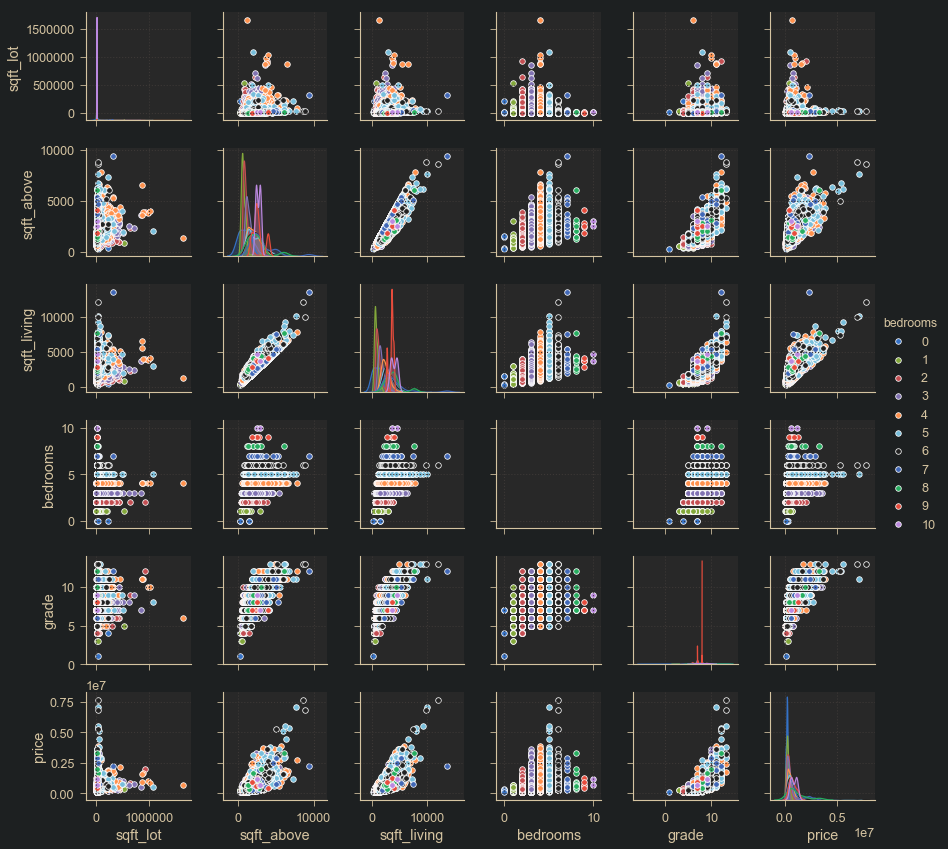

In [14]:
cols=['sqft_lot','sqft_above','sqft_living','bedrooms','grade','price']
sns.plotting_context(font_scale=1.5)
sns.pairplot(df[cols], hue='bedrooms', size=2)
# bedrooms에 따른 다양한 상관관계 표출 / hue값에 따라 다른 색상 표현

In [20]:
# sns.lmplot(x='sqft_living',y='price',hue='grade',data='df',fit_reg=False)
# sns.lmplot(x='sqft_living',y='price',hue='waterfront',data='df',fit_reg=False)

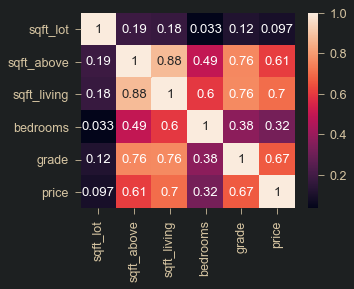

In [21]:
sns.heatmap(df[cols].corr(),annot=True)

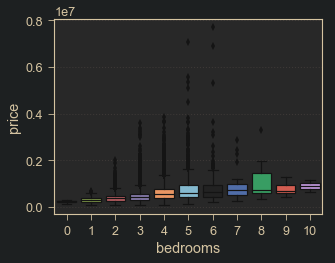

In [22]:
sns.boxplot(x=df['bedrooms'],y =df['price'])

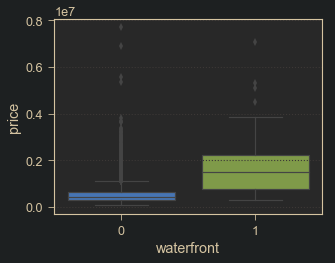

In [23]:
sns.boxplot(x=df['waterfront'],y =df['price'])

In [63]:
# still in visual viiztion part
# 3차원 그래프 그리귀
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 방수 면적, 집크기 = 시각화
fig=plt.figure(figsize=(12,8))
ax=flg.add_subplot(1,1,1, projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],\
           df['bedrooms'],c='green', alpha=.5)
ax.set(xlabel='living', ylabel='sqft_lot', zlabel='Bedrooms')
ax.set(ylim=[0,250000])

[(0, 250000)]

<Figure size 864x576 with 0 Axes>

In [40]:
from sklearn.model_selection import train_test_split
train_df1,train_df2=train_test_split(df, train_size=0.8, random_state=42)


In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model=LinearRegression() # train data
model.fit(train_df1[['sqft_living']], train_df1[['price']]) # train data
#  모델작성끝 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1]:
# 회귀분석 모델평가( 결정계수, R square)
# 이번수업시간에 하는것이아님 just for explain 

# 실제값 - 예측값 = 잔차의 제곱합을 최소화 
# 0 <= 결정계수 ( 설명력 ) <= 1 
# Q : 전체 데이터의 편차 제곱의 합 
# Qe : 전체 데이터 잔차 제곱의 합 

# 결정계수(R2) = (Q-Qe)/Q
# LinearRegression 클래스의 score함수를 이용헤서 결정계수 얻을

In [50]:
score = model.score(train_df2[['sqft_living']],train_df2[['price']])
print(format(score, '.3f'))

0.484


In [79]:
features=['sqft_living','bedrooms','bathrooms',
                     'sqft_lot','floors','zipcode','view','waterfront','grade','yr_built']
model.fit(train_df1[['sqft_living','bedrooms','bathrooms',
                     'sqft_lot','floors','zipcode','view','waterfront','grade','yr_built']],
          train_df1[['price']]) 

score = model.score(train_df2[['sqft_living','bedrooms','bathrooms',
                               'sqft_lot','floors','zipcode','view',
                               'waterfront','grade','yr_built']],
                    train_df2[['price']]) 

print(format(score, '.3f'))
# 다항 선형회귀법 완료

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.793


In [51]:
predicted=model.predict(train_df2[['sqft_living']])
print(predicted)

[[368244.47878762]
 [493639.69539596]
 [348295.23978175]
 ...
 [305546.87048345]
 [476540.34767664]
 [308396.76177   ]]


In [53]:
# cost 낮아지는 방향으로 w,b를 조정해갔었음

print(model.intercept_) # 기울기 # bias가 크게 나온다 
print(model.coef_) # 상수

[-53539.43162226]
[[284.98912866]]


In [54]:
# 분류모델에 대한 평가 ( 회기모델 x )
from sklearn.metrics import confusion_matrix # 여러개, 다중분류에 경우 confusion_matrix사용
xtrue=[2,0,2,2,0,1]
xpred=[0,0,2,2,0,2] 
confusion_matrix(xtrue, xpred) # 실제값 
# 행인덱스 자리에 실제값에 해당하는 숫자가 있다고 생각 
# 0 , 1 , 2
# 열인덱스 => 0,1,2 
# 해석법 : 실제가 1일때 예측값이 2인게 1개 있다 (2,3)
# prediction value

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [58]:
# 이진분류( positive OR negative )
# ex) 불량품 분류기 (불량품 : 양성, 정상품 : 음성)
# -TP : 불량품을 불량품(P)으로 맞게(T) 예측
# -TN : 정상품을 정상품(N)으로 맞게(T) 예측
# -FP : 정상품을 불량품(P)으로 틀리게(F) 예측
# -FN : 불량품을 정상품(N)으로 틀리게(F) 예측


In [59]:
xtrue=[1,0,1,1,0,1]
xpred=[0,0,1,1,0,1]
confusion_matrix(xtrue,xpred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [60]:
# 정확도 = (TP+TN) / (TP + TN + FP + FN)
# 정밀도 = TP/(TP + FP)
# 재현율 = TP/(TP + FN)
# F점수 = 2 * 정밀도 * 재현율 / ( 정밀도 + 재현율)

In [ ]:
# 방금전 만든 조합에서 변수를 좀더 올려서 정확률을 높여보자!! 


In [ ]:
# 중요척도 // 조합해서 맞춘 확률 : f_measure
# precision = 암이라고 
# recall = 암이 아니라고 예측했는데 암인 확률 
#  정밀도는 검색된 결과들 중 관련 있는 것으로 분류된 결과물의 비율이고, 
#     재현율은 관련 있는 것으로 분류된 항목들 중 실제 검색된 항목들의 비율이다

In [80]:
# knn 알고리즘 -> 예측
from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor(n_neighbors=9)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features], train_df2['price'])
print(format(score,'.3f'))


0.501


In [92]:
# decision tree
model= KNeighborsRegressor()
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features], train_df2['price'])
print(format(score,'.3f'))
predicted=model.predict(train_df2[features])
print(predicted)


0.474
[307840. 395800. 526800. ... 282724. 429400. 393000.]


In [93]:
# decision tree
model= RandomForestRegressor(random_state=42, n_estimators=27)
model.fit(train_df1[features], train_df1['price'])
score=model.score(train_df2[features], train_df2['price'])
print(format(score,'.3f'))
predicted=model.predict(train_df2[features])
print(predicted)

0.793
[298496.2962963  276498.14814815 559725.92592593 ... 339377.33333333
 506681.48148148 428766.66666667]


In [94]:
testdf=pd.read_csv('data/q/HPA/test.csv')
testdf.shape
predicted=model.predict(testdf[features])
ss=pd.read_csv('data/q/HPA/sample_submission.csv')
ss['price']=predicted # 예측값
ss.to_csv('data/q/HPA/subfile.csv',index=False)

In [95]:
# # 성능 올리려면 ? 
# # 성능개선 80% 근처
# 1. 가중치
# 2. 파생변수 
# 3. 아웃라이어처리
# 4. 값 -> 구간화(ohe)
# 5. 칼럼값에 대한 표준화/ 정규화
# 6. 딥러닝
# 7. 앙상블모델 ( 모델혼용 )

In [ ]:
# 연속형 수치가 있을때 => regression // bur 이를 이용해 classification
# 0 or 1 : 이산형
# 해당 직선( 회귀 )상,  임계치를 정해, 그 위는 1, 그 아래는 0 
# x 축 종양 크기, y축 암 유무 판별 ( 0, 1 )
# 문제점 잔존!! 
# 종양의 크기의 기준 자체가 올랐다 (이상치) => 임계치 기준 모호
# 임계치 기준이 올라가면서 기존의 암 유무 판별 불가능
# 솔루션
# 출력되어지는 hf 값이 0-1사이로 유지되게끔 해준다
# 함수(sigmoid) 함수를 통해 틀을 잡아줌
# -1 ~ 1  사잇값 유지 -[쌍곡 탄젠트 함수]
# sigmoid ( s자형 ) = 제곱하면 산모퉁이 반복형 그래프 
# 경사면을 따라 미분 -> descent opt 함수 
# 양수면, w의 값을 감소시키게 된다 
# 음수면, w의 값을 증가시키게 된다 좀더 큰 값으로 updating

# understanding cost func 

# 정의역 0 - 1 
# 치역 0 - 무한대 

# log 0 : 무한대
# log 1 : 0

# if (H(x) = 0), cost = 0 . 우리의 예측이 맞는것
# if (H(x) = 1), cost = 무한대 . 우리의 예측이 틀린것

In [96]:
############################## 오후코딩 ##################################

In [98]:
import tensorflow as tf
xdata = [[1,2],
         [2,3],
         [3,1],
         [4,3],
         [5,3],
         [6,2]]
ydata = [[0],
         [0],
         [0],
         [1],
         [1],
         [1]]



In [ ]:
# 이진분류 ex # 동물분류 : 파충류 vs 포유류
# feature : 다리의 유무 or 날개의 유무 


In [99]:
# 'data/diabete/diabetes.csv'

In [107]:
x=tf.placeholder(tf.float32, shape=[None,2]) # 데이터의 갯수가 일정치 않아 
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]), name='weight')
# 입력속성 2개 출력결과 1개
b=tf.Variable(tf.random_normal([1]), name='bias')
# 출력결과 1개
# [None,2] [2,1] = [None,1]
#     x      w        y   

# 행렬간 곱셉 // tf (matmul)
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))
# .reduce_mean : 배열의 평균
# hf : 0-1 
# 0.5 ^ : 1
# 0.5 . : 0

In [122]:
# tensorflow = cast [ 변환해주는 함수 ]
predicted = tf.cast(hf>0.5, dtype=tf.float32) # 1번째인수를2번째인수로 변환 

train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
# cost에 대해 minimize 중 
# accuracy node 추가 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32)) # boolen (true or false)

# 원래는 True Or False
# tf ) node로 정의해라 
# 첫번째인수를 2번째인수 dtype으로 변환해준다 
# True : 1.0 
# False : 0.0


In [124]:
# with 구문  
# 구문 벗어나면 자동으로 해당 객체 close 된다 (session)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict={x:xdata, y:ydata}) 
        if step % 200 == 0 : 
            print(step, cv)
        # train 노드 # cost 함수 변화추이 확인
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print('hf=', hv, 'pred=', pv, 'acc=', av)


0 0.88661736
200 0.68624943
400 0.6615009
600 0.6375473
800 0.61439705
1000 0.5920601
1200 0.5705449
1400 0.54985636
1600 0.5299954
1800 0.5109582
2000 0.49273682
2200 0.47531846
2400 0.45868656
2600 0.44282112
2800 0.42769942
3000 0.41329613
3200 0.39958468
3400 0.3865367
3600 0.37412366
3800 0.36231622
4000 0.35108542
4200 0.34040236
4400 0.33023906
4600 0.32056803
4800 0.31136262
5000 0.30259755
5200 0.2942482
5400 0.28629154
5600 0.27870518
5800 0.27146837
6000 0.26456112
6200 0.25796494
6400 0.25166193
6600 0.24563552
6800 0.23987013
7000 0.23435122
7200 0.22906482
7400 0.2239982
7600 0.21913911
7800 0.21447627
8000 0.20999907
8200 0.20569754
8400 0.20156227
8600 0.19758451
8800 0.19375606
9000 0.1900692
9200 0.18651675
9400 0.1830918
9600 0.17978811
9800 0.17659967
10000 0.17352082
hf= [[0.04145255]
 [0.17122854]
 [0.35261303]
 [0.7603383 ]
 [0.92555106]
 [0.9755848 ]] pred= [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] acc= 1.0


In [125]:
x.shape
# pd.read_csv='data/diabete/diabetes.csv'

TensorShape([Dimension(None), Dimension(2)])

In [126]:
xy=np.loadtxt('data/diabete/diabetes.csv',delimiter=',') # 구분자
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [129]:
# x,y 데이터 분리하기 
xdata=xy[:, 0:-1]
ydata=xy[:, [-1]] # 마지막 열 하나 도출 
xdata.shape # (759, 8)
ydata.shape # (759,1)

(759, 1)

In [133]:
x = tf.placeholder(tf.float32, shape=[None,8]) # 데이터의 갯수가 일정치 않아 
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))

# 인자에 축(axis가 붙는다) => 어떤축을 기준으로 정렬할지 의미 내포
# (100,5) 2차원을 1차원으로 바꾸는 역할맡는다 
# 깊이에 해당하는 축을 기준으로 삼는다 

train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# hf = sigmoid(1*x-2) 
# hf = sigmoid(w1x1+ w2x2+ b)= decision boundary 직선함수 

# 당뇨병이다 아니다 -> decision boundary 
# 함숫값이 음수면 0에 가까워진다 
# 함수값이 양수면 1에 가까워진다 
# logistic regrassion 

In [134]:
predicted = tf.cast(hf>0.5, dtype=tf.float32) 
# 임계치는 주관적으로 정해라 ex) 0.05 => 해당도메인에 대한 분석과지식이 중요
# false positive - 암인줄알았는데 틀린거 용서가능 
# false negative - 암이 아닌줄알았는데 틀린거 용서불가능

# 해석방향 : 아래서 위로 
# accracy 실행과정중 predicted 역할수행자 필요
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32)) 
# boolen (true or false)



In [137]:
# 그래프정의 그래프실행 
# 그래프 정의 구성요소 : 노드, 엣지

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        cv,_=sess.run([cost,train], feed_dict={x:xdata, y:ydata})
        if step%200== 0:
            print(step,cv)
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print('hf=', hv, 'pred=', pv, 'acc=', av)

    # 환자 비환자의 사진보여주기 반복 & 반복 => 천명중 770명정도 맞았다 
# 당뇨병검사수치만 주면 당뇨병환자확률 판별가능 


0 0.84132636
200 0.72562116
400 0.6926165
600 0.6733846
800 0.6577158
1000 0.64385456
1200 0.6313796
1400 0.6201033
1600 0.60988975
1800 0.6006226
2000 0.5921992
2200 0.584529
2400 0.5775315
2600 0.5711357
2800 0.565279
3000 0.55990595
3200 0.5549673
3400 0.5504198
3600 0.54622495
3800 0.54234844
4000 0.53876036
4200 0.5354336
4400 0.53234386
4600 0.5294699
4800 0.5267926
5000 0.5242947
5200 0.52196074
5400 0.51977694
5600 0.5177309
5800 0.51581126
6000 0.514008
6200 0.5123119
6400 0.5107147
6600 0.5092088
6800 0.5077874
7000 0.5064444
7200 0.5051739
7400 0.5039709
7600 0.5028306
7800 0.50174874
8000 0.50072134
8200 0.49974465
8400 0.49881545
8600 0.4979307
8800 0.49708745
9000 0.49628317
9200 0.49551544
9400 0.49478215
9600 0.49408105
9800 0.4934103
10000 0.49276817
10200 0.49215308
10400 0.49156335
10600 0.49099767
10800 0.4904547
11000 0.48993322
11200 0.48943213
11400 0.48895022
11600 0.48848662
11800 0.48804036
12000 0.48761052
12200 0.4871963
12400 0.48679695
12600 0.48641175
128